# Deep-learning-final-project
## CIFAR-10 Object Recognition
## Kavitha Sundaram

Downloaded from toronto.edu dataset repository.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.\
There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. \
The test batch contains exactly 1000 randomly-selected images from each class. \
The training batches contain the remaining images in random order, but some training \
batches may contain more images from one class than another. Between them, \
the training batches contain exactly 5000 images from each class.

DataSource:http://www.cs.toronto.edu/~kriz/cifar.html \
citation:http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf



## Contents:

* Imports:
* Description:
* EDA:
* Image Processing
* Prediction & Analysis
* Conclusion
* Reference

## Imports:

Below listed are the main libraries used in this project:
1. Pandas
2. NumPy
3. Seaborn
4. Plotly
5. scikit-learn
6. Matplotlib

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.animation as animation
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
# Prints the current working directory
os.getcwd()
#changing my working directory as per project folder BBC files.
%cd "/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5511/final exam/cifar-10-batches-py"


/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5511/final exam/cifar-10-batches-py


In [2]:
#list of datafiles from UCI ML Data repository dataset
os.listdir("./")

['data_batch_1',
 '.DS_Store',
 'images1.png',
 'readme.html',
 'batches.meta',
 'data_batch_2',
 'data_batch_5',
 'test_batch',
 'data_batch_4',
 'data_batch_3']

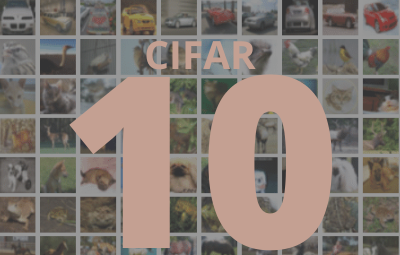

In [3]:
from IPython import display
display.Image("./images1.png")

## Description:

In deep learning, a computer model learns to perform classification tasks directly from images, text, or sound.\
Image classification is one of the most important applications of deep learning, refers to assigning labels \
to images based on certain characteristics or features present in them. The algorithm identifies these \
features and uses them to differentiate different images and assign labels to them. In this project,\
my goal is to classify images from CIFAR-10 dataset by training Convolutional Neural Networks (CNNs). 
Am going to build the model using CNN with 4 model classifications and find the best model for hyperparameter
tuning and predict roc_accuracy curve to find score.

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

You can notice that the total images in the train dataset is 50,000. The size of each image is (32,32,3). The image height and width is 32 each having 3 channels- RGB. 

You can print the size of the test dataset the same as we printed train dataset. Use X_test.shape to find the shape/ size of test dataset. 

In [5]:
def unpickle(cf):
    import pickle
    with open(cf, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [6]:
# Load in customers data 
cf = r'./data_batch_1'
data_batch_1 = unpickle(cf)
print(type(data_batch_1))
print(data_batch_1.keys())
for item in data_batch_1:
    print(item, type(data_batch_1[item]))
    

<class 'dict'>
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>


In [7]:
print("Labels:", set(data_batch_1['labels']))

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
X_train = data_batch_1['data']
X_train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [9]:
X_train.shape

(10000, 3072)

The whole data_batch_1 has 10,000 images. And each image is a 1-D array having 3,072 entries.\
First 1024 entries for Red, the next 1024 entries for Green and last 1024 entries for Blue channels.\
To visualise the images we have to change the shape of image as (32,32,3).

For the image label names, we load meta file ‘ batches.meta’ using same unpickle() function.

In [10]:
meta_file = r'./batches.meta'
meta_data = unpickle(meta_file)

In [11]:
print(type(meta_data))
print(meta_data.keys()) 

<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])


In [12]:
print("Label Names:", meta_data['label_names'] )

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Lets reshape the image into (3,32,32) and 3 for RGB channels.

In [13]:
image = data_batch_1['data'][0]
image = image.reshape(3,32,32)
print(image.shape)

(3, 32, 32)


Next, we transpose single image:

In [14]:
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


Lets reshape and transpose CIFAR-10 dataset:

In [15]:
X_train = data_batch_1['data']
print("Shape before reshape:", image.shape)
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
print("Shape after reshape and before transpose:", image.shape)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", image.shape)

Shape before reshape: (32, 32, 3)
Shape after reshape and before transpose: (32, 32, 3)
Shape after reshape and transpose: (32, 32, 3)


Text(0.5, 1.0, 'frog')

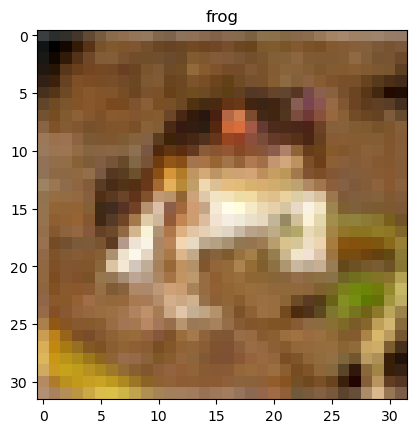

In [16]:
import matplotlib.pyplot as plt
# label names
label_name = meta_data['label_names']
# take first image
image = data_batch_1['data'][0]
# take first image label index
label = data_batch_1['labels'][0]
# Reshape the image
image = image.reshape(3,32,32)
# Transpose the image
image = image.transpose(1,2,0)
# Display the image
plt.imshow(image)
plt.title(label_name[label])

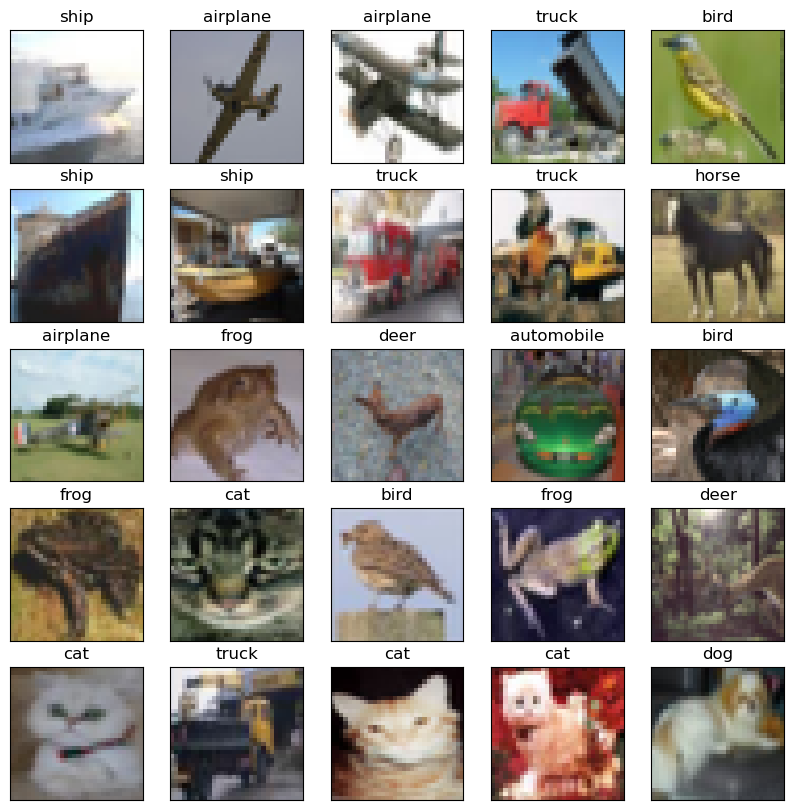

In [17]:
# Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
import numpy as np
# take the images data from batch data
images = data_batch_1['data']
# reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
# take labels of the images 
labels = data_batch_1['labels']
# label names of the images
label_names = meta_data['label_names']


# dispaly random images
# define row and column of figure
rows, columns = 5, 5
# take random image idex id
imageId = np.random.randint(0, len(images), rows * columns)
# take images for above random image ids
images = images[imageId]
# take labels for these images only
labels = [labels[i] for i in imageId]

# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(label_names[labels[i-1]]))
plt.show()


In [18]:
X_train = X_train.astype('float32')         
#x_test = x_test.astype('float32')
#X_train = X_train / 255.0
#X_test = X_test / 255.0

Before the model is ready for training. Below I setup the loss function, optimizer and metrics for compiling

### Model1:
optimizer = 'adam'

loss = 'sparse_categorical_crossentropy'
Using tf.keras.layers model for building

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train = X_train.astype('float32')         
X_test = X_test.astype('float32')
X_train /= 255.0              
X_test /= 255.0

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

model.summary() 

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [20]:

history = model.fit(X_train, y_train, batch_size=32, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20


2023-04-29 19:44:10.642780: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 11s 7ms/step - loss: 1.4624 - accuracy: 0.4882 - val_loss: 1.2955 - val_accuracy: 0.5459
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1940 - accuracy: 0.5853 - val_loss: 1.1887 - val_accuracy: 0.5817
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0951 - accuracy: 0.6221 - val_loss: 1.1370 - val_accuracy: 0.6082
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0308 - accuracy: 0.6456 - val_loss: 1.1262 - val_accuracy: 0.6092
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9834 - accuracy: 0.6610 - val_loss: 1.0846 - val_accuracy: 0.6266
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9421 - accuracy: 0.6766 - val_loss: 1.0741 - val_accuracy: 0.6258
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9090 - accuracy: 0.6872 - val_loss: 1.0750 - val_accuracy: 0.6

We train our network for 20 epochs. You can train for hundreds of epochs. Notice the accuracy is increasing slowly for higher epochs.

We get the training accuracy of 78.68% and the validation accuracy of 62.70%. 

You may increase these accuracies by training the model for more epochs. You may use use data augmentation also. This also helps achieving better validation accuracy using the technique of data augmentation. Data augmentation is a technique for data pre-processing. Using this technique we generate different types of images by transforming the images available in the dataset.

Here we have completed the training part of the model. Now move to test or evaluate our network/ model.

### Validation and test model:

Now evaluate the model on the test data. Find the predicted scores and classes of test dataset using model.predict(X_test).

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 1ms/step


In [22]:
y_pred

array([[3.8024204e-04, 1.2251070e-04, 4.4484157e-03, ..., 2.6790554e-05,
        2.5320420e-01, 3.9104349e-03],
       [1.9394684e-03, 3.6752648e-03, 6.2945791e-09, ..., 1.1866284e-09,
        9.9417180e-01, 2.1333860e-04],
       [4.8332635e-01, 6.4202286e-02, 9.4592562e-03, ..., 5.8095914e-04,
        4.1243699e-01, 2.6870137e-02],
       ...,
       [1.5968475e-05, 2.3909565e-06, 8.2238637e-02, ..., 5.1319459e-03,
        7.7101176e-05, 6.5278946e-06],
       [5.0194579e-01, 3.7734210e-01, 3.7755276e-04, ..., 2.8556131e-05,
        1.5151117e-04, 3.6546582e-04],
       [6.4763167e-06, 6.3707589e-06, 1.9505457e-04, ..., 8.5522276e-01,
        1.5336956e-05, 1.2964935e-05]], dtype=float32)

We will predict some images from test dataset. We display the images and corresponding predicted class labels.

313/313 [==============================] - 0s 1ms/step
[[3.8024204e-04 1.2251070e-04 4.4484157e-03 ... 2.6790554e-05
  2.5320420e-01 3.9104349e-03]
 [1.9394684e-03 3.6752648e-03 6.2945791e-09 ... 1.1866284e-09
  9.9417180e-01 2.1333860e-04]
 [4.8332635e-01 6.4202286e-02 9.4592562e-03 ... 5.8095914e-04
  4.1243699e-01 2.6870137e-02]
 ...
 [1.5968475e-05 2.3909565e-06 8.2238637e-02 ... 5.1319459e-03
  7.7101176e-05 6.5278946e-06]
 [5.0194579e-01 3.7734210e-01 3.7755276e-04 ... 2.8556131e-05
  1.5151117e-04 3.6546582e-04]
 [6.4763167e-06 6.3707589e-06 1.9505457e-04 ... 8.5522276e-01
  1.5336956e-05 1.2964935e-05]]


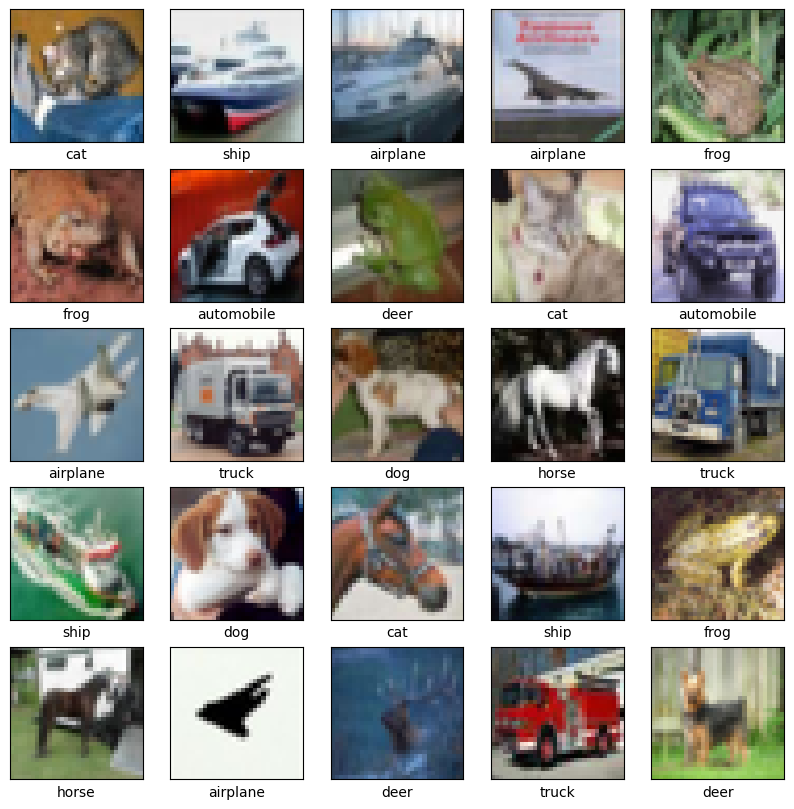

In [23]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(X_test)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(labels[y_classes[i]])
plt.show()

313/313 - 1s - loss: 1.1267 - accuracy: 0.6403 - 1s/epoch - 3ms/step


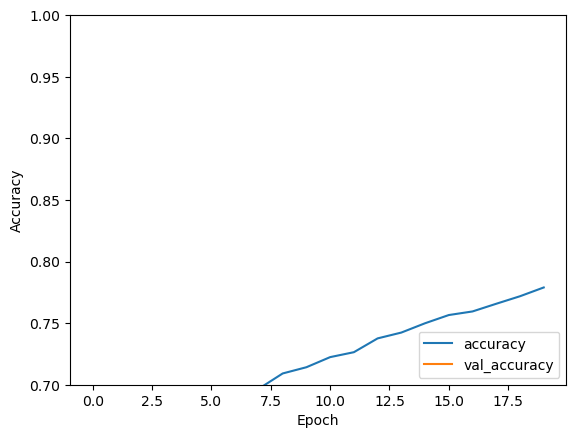

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [25]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1000
           1       0.80      0.68      0.74      1000
           2       0.48      0.51      0.50      1000
           3       0.54      0.37      0.44      1000
           4       0.55      0.62      0.58      1000
           5       0.54      0.60      0.57      1000
           6       0.74      0.70      0.72      1000
           7       0.73      0.72      0.72      1000
           8       0.67      0.80      0.73      1000
           9       0.71      0.74      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [26]:
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_classes))

confusion matrix:
 [[653  17  71  11  37   8  11   7 140  45]
 [ 44 681  19  11   7   7   6   8  81 136]
 [ 75   8 513  44 129  87  66  42  22  14]
 [ 25  14 101 367  97 236  68  37  30  25]
 [ 22   3 119  44 622  51  51  64  18   6]
 [ 12   8  96 107  57 603  24  63  20  10]
 [  9   9  68  48  79  47 704  15  12   9]
 [ 20   5  49  24  80  69   4 718   7  24]
 [ 77  34  14   8  12   9   9   3 800  34]
 [ 41  72  19  12  11   7   5  25  66 742]]


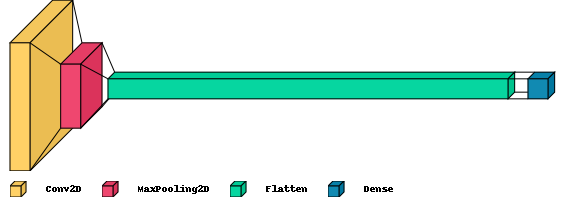

In [27]:
import visualkeras
visualkeras.layered_view(model, legend=True,spacing=20)

### Model2:

In [28]:
# number of classes
y_train = y_train.reshape(-1,)
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))


# model description
model.summary()

number of classes: 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                

In [29]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [30]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3107 - accuracy: 0.5502 - val_loss: 0.9934 - val_accuracy: 0.6527
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8276 - accuracy: 0.7113 - val_loss: 0.8028 - val_accuracy: 0.7235
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6744 - accuracy: 0.7676 - val_loss: 0.6967 - val_accuracy: 0.7692
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5627 - accuracy: 0.8067 - val_loss: 0.6787 - val_accuracy: 0.7712
Epoch 5/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4789 - accuracy: 0.8334 - val_loss: 0.6022 - val_accuracy: 0.7996
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.6756 - val_accuracy: 0.7798
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.3382 - accuracy: 0.8824 - val_loss: 0.7085 -

In [31]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 4ms/step


In [32]:
y_pred

array([[9.7262884e-08, 2.3742707e-06, 8.0410849e-05, ..., 2.0895752e-06,
        1.8557230e-07, 3.0086483e-07],
       [5.5660458e-09, 9.8341620e-01, 3.8166868e-17, ..., 6.1034055e-16,
        1.6583795e-02, 4.6026227e-10],
       [6.1271159e-05, 1.1910840e-08, 1.3560560e-09, ..., 8.5704620e-12,
        9.9993873e-01, 7.0322748e-10],
       ...,
       [1.0773986e-08, 1.0919163e-09, 1.0611559e-06, ..., 1.5579972e-04,
        8.1440907e-09, 5.2849454e-09],
       [2.4212977e-06, 9.9999499e-01, 4.0686182e-08, ..., 7.0668569e-09,
        5.2242576e-08, 5.7554317e-08],
       [7.0768524e-17, 2.1433763e-18, 1.1538168e-14, ..., 1.0000000e+00,
        6.3945590e-19, 9.3109649e-22]], dtype=float32)

313/313 [==============================] - 1s 4ms/step
[[9.7262884e-08 2.3742707e-06 8.0410849e-05 ... 2.0895752e-06
  1.8557230e-07 3.0086483e-07]
 [5.5660458e-09 9.8341620e-01 3.8166868e-17 ... 6.1034055e-16
  1.6583795e-02 4.6026227e-10]
 [6.1271159e-05 1.1910840e-08 1.3560560e-09 ... 8.5704620e-12
  9.9993873e-01 7.0322748e-10]
 ...
 [1.0773986e-08 1.0919163e-09 1.0611559e-06 ... 1.5579972e-04
  8.1440907e-09 5.2849454e-09]
 [2.4212977e-06 9.9999499e-01 4.0686182e-08 ... 7.0668569e-09
  5.2242576e-08 5.7554317e-08]
 [7.0768524e-17 2.1433763e-18 1.1538168e-14 ... 1.0000000e+00
  6.3945590e-19 9.3109649e-22]]


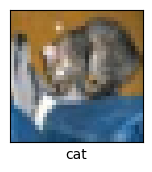

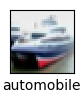

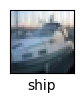

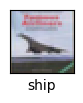

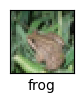

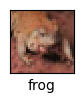

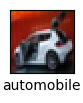

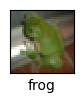

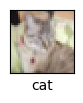

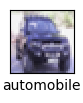

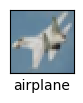

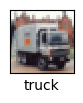

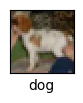

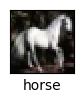

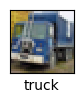

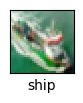

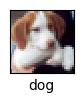

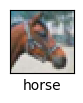

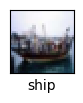

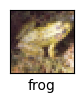

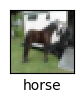

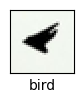

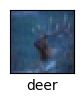

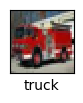

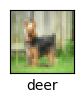

In [33]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(X_test)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
plt.figure(figsize=(10,10))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
     # The CIFAR labels happen to be arrays, 
     # which is why you need the extra index
     # print(y_train[i])
     # plt.xlabel("True class:{} "'\n Predicted class: {}' ,labels[y_train[i]], )
    plt.xlabel(labels[y_classes[i]])
    plt.show()

313/313 - 2s - loss: 0.8383 - accuracy: 0.8086 - 2s/epoch - 7ms/step


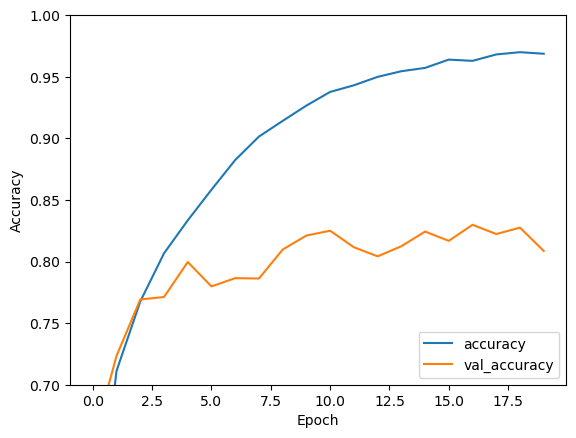

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [35]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.82      1000
           1       0.86      0.95      0.91      1000
           2       0.68      0.80      0.73      1000
           3       0.70      0.63      0.66      1000
           4       0.76      0.82      0.79      1000
           5       0.76      0.71      0.74      1000
           6       0.79      0.91      0.84      1000
           7       0.94      0.76      0.84      1000
           8       0.85      0.91      0.88      1000
           9       0.94      0.81      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [36]:
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_classes))

confusion matrix:
 [[786  18  79   7  13   3  12   3  72   7]
 [  2 952   5   0   2   1   6   1  12  19]
 [ 29   5 797  31  58  25  38   8   7   2]
 [ 13   4  82 627  61  99  84  10  15   5]
 [  8   2  60  34 821  19  34  13   6   3]
 [  8   4  62 114  39 714  40  13   3   3]
 [  3   2  40  21  16   6 905   1   4   2]
 [ 11   3  37  41  63  62  12 763   3   5]
 [ 24  22  14  10   5   1   7   1 910   6]
 [ 24  90   4  12   1   4  14   3  37 811]]


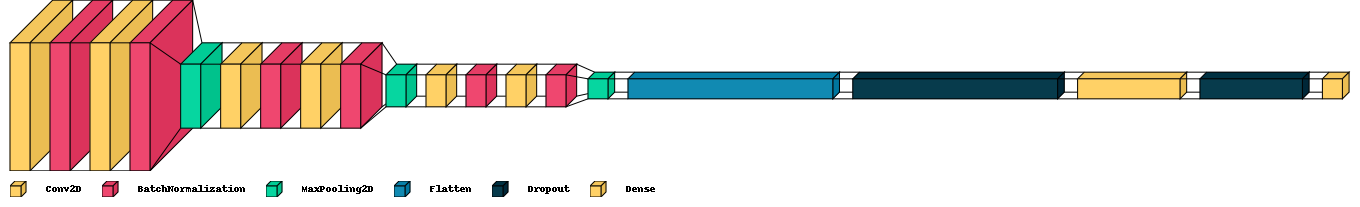

In [37]:
import visualkeras
visualkeras.layered_view(model, legend=True,spacing=20)

We train our network for 15 epochs. You can train for hundreds of epochs. Notice the accuracy is increasing slowly for higher epochs.

We get the training accuracy of 97.11% and the validation accuracy of 85.84%. 

You may increase these accuracies by training the model for more epochs. You may use use data augmentation also. This also helps achieving better validation accuracy using the technique of data augmentation. Data augmentation is a technique for data pre-processing. Using this technique we generate different types of images by transforming the images available in the dataset.

Here we have completed the training part of the model. Now move to test or evaluate our network/ model.

At this point we have a trained model that performs with approximately 90% accuracy. \
We could use new images use it as input for the model and make predictions on new data.

Keras provides a high-level interface that makes it very friendly to take advantage of \
deep learning. One of the downsides of deep learning is that it requires massive amounts of \
data to be effective.

### Conclusion:

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field \
of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% \
classification accuracy. Top performance on the problem is achieved by deep learning convolutional \
neural networks with a classification accuracy above 80% on the test dataset.
We can further model the datset using Baseline VGG block with 3 levels of training and modeling \
the dataset for further accuracy results.
Deep Learning (this type of machine learning and artifical intelligence )is pretty hard to learn\
and generate accuracy with image classification.\
I have used some refrences for this project.
Keras helped me a lot with coding chunks and optimizing the deep learning algorithm and \
basic principles of deep learning.\
**Model 1 did not get accuracy more than 70% whereas Model 2 after optimizing some layers of sequential \
got the accuracy more than 90% for CIFAR-10 prediction of Image classification model.\
We finally predicted images with 90% accuracy**.

### Github Repository:

https://github.com/kavishant87/5511-final-project-Cifar10

### References:

https://www.binarystudy.com/2022/08/image-classification-with-cifar10-dataset-tensorflow-keras.html \
https://keras.io/api/datasets/cifar10/ 

